<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_PCA_for_Data_Visualization_%5BPractice_Exercise%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfsaRE3Pq4HcnCgIb5hgszzYNcKQBoypmZm2zW9Q9hU9-tWdtP8qxBBsiUWMFKzG66unPOdi-lfKdM/pub?gid=794640114&single=true&output=csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# 3. Drop Unnecessary Columns

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Customer Id', 'Defaulted'])

# 4. EDA and Cleaning

In [ ]:
# Checking for duplicates
print(df.duplicated().sum())

0


In [ ]:
##checking for missing values
df.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
DebtIncomeRatio,0


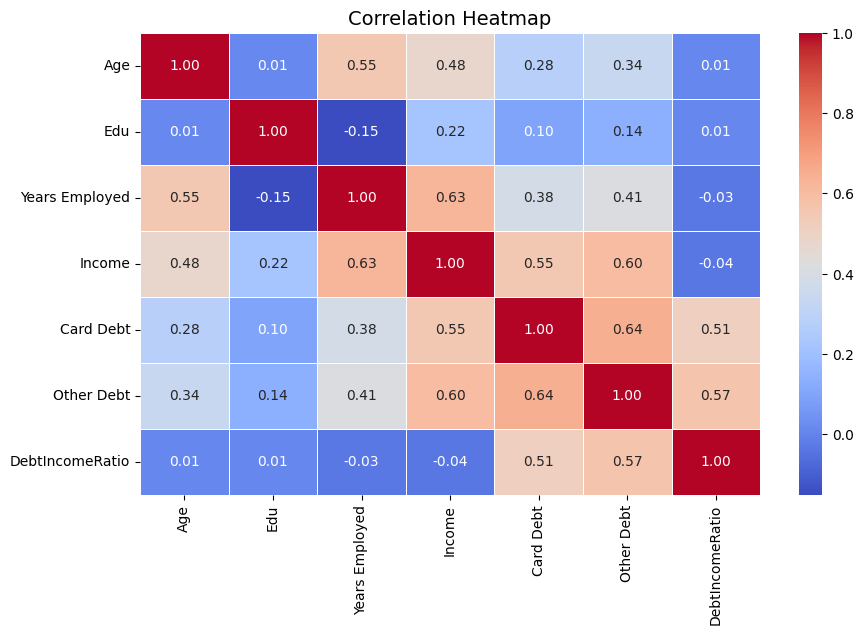

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

**Interpretation.**

The correlation heatmap shows that a strong positive correlation (0.63) between income and years employed, suggesting longer work experience leads to higher earnings. There is a strong positive correlation (0.64) between card Debt and other Debt while debts are also interconnected, with card debt, other debt, and income showing strong positive and moderate relationships with other Debt and card Debt (0.60 and 0.55) respectively indicating that higher earners tend to hold more debt, likely due to greater access to credit. There is also a positive moderate relationship between Debt income Ratio with Other Debt and Card Debt (0.57 and 0.51) respectively. Age is moderately related to employment years(0.55), but education shows little to no correlation with financial indicators, implying it plays a limited role in explaining income, employment, or debt patterns within this dataset.



/tmp/ipython-input-3920516735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Edu', data=df, palette='viridis')


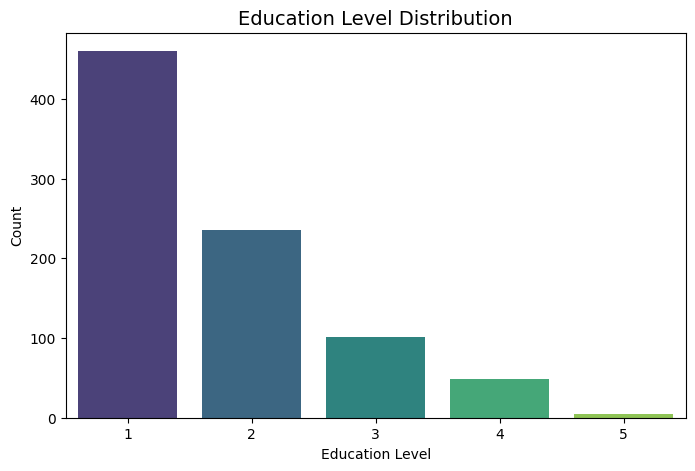

In [ ]:
# Plot education distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Edu', data=df, palette='viridis')
plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

**Interpretation.**

The bar graph above shows a clear distribution of education levels where the majority of individuals of around 450 are under Education Level 1, while the number of individuals decreases significantly as the education level increases. Education Level 5 has the lowest count, with fewer than 10 individuals.

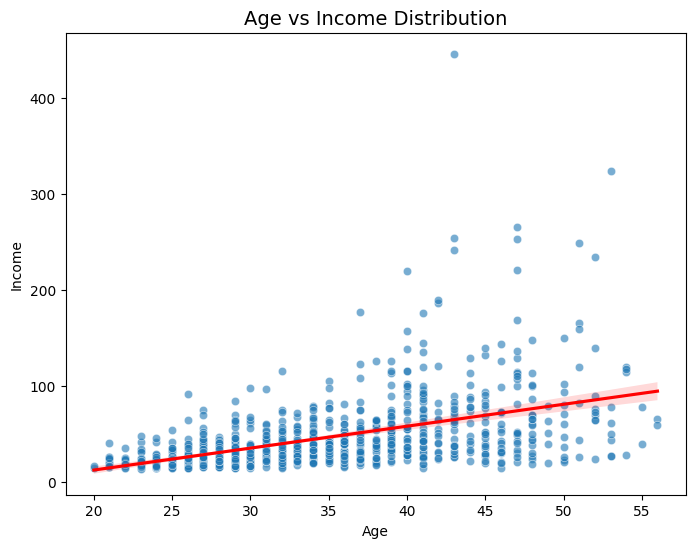

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df, alpha=0.6)
sns.regplot(x='Age', y='Income', data=df, scatter=False, color='red')
plt.title('Age vs Income Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Interpretation.**

The scatter plot above shows that, there is a strong positive correlation between age and income. The plot shows a general trend whereas age increases, income also tends to increase. This is highlighted by the red regression line, which slopes upward, indicating the average relationship between the two variables. While the trend is clear, the data points are not tightly clustered around the line, showing significant variability in income at any given age. This suggests that while older individuals on average earn more, factors other than age also heavily influence a person's income.

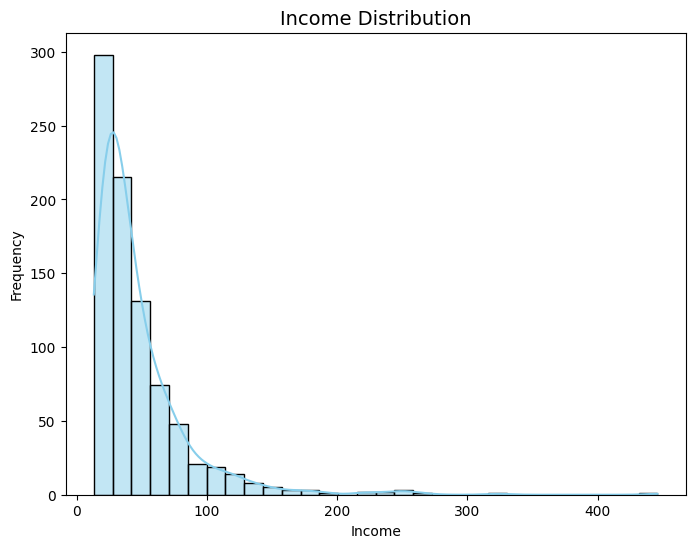

In [ ]:
# Histogram + KDE for income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Income Distribution', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


**Interpretation**.

The histogram above shows a highly skewed distribution of income, where the majority of individuals have a low income and only a small number of people have a very high income.

# 5. Scale Data

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

In [ ]:
from sklearn.metrics import silhouette_score
kmeans.inertia_
silhouette_score(scaled_df,kmeans.labels_)

np.float64(0.38115575548634506)

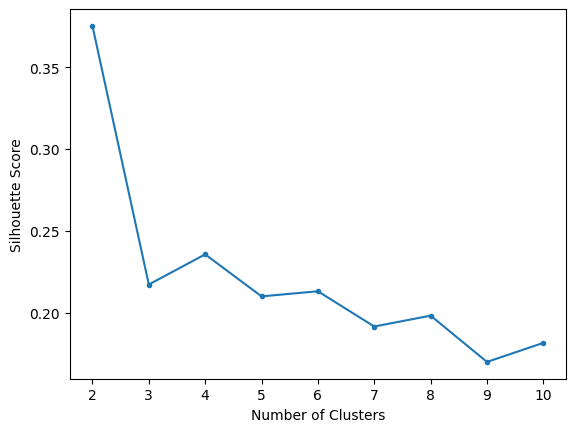

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Based on the Silhouette Score analysis, the optimal number of clusters for this dataset is 2. The plot above shows that the silhouette score is maximized when the data is grouped into two distinct clusters.

In [ ]:
kmeans_final = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(scaled_df)
df['Cluster'] = kmeans_final.labels_

In [ ]:
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Edu': 'mean',
    'Years Employed': 'mean',
    'Income': 'mean',
    'Card Debt': 'mean',
    'Other Debt': 'mean',
    'DebtIncomeRatio': 'mean'
}).round(2)
print("Cluster Characteristics:")
print(cluster_analysis)

Cluster Characteristics:
           Age   Edu  Years Employed  Income  Card Debt  Other Debt  \
Cluster                                                               
0        33.05  1.65            6.56   33.94       0.94        1.92   
1        42.59  1.95           16.26   95.44       4.01        7.53   

         DebtIncomeRatio  
Cluster                   
0                   9.12  
1                  14.20  


# 7. Transform the Scaled Data with PCA

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

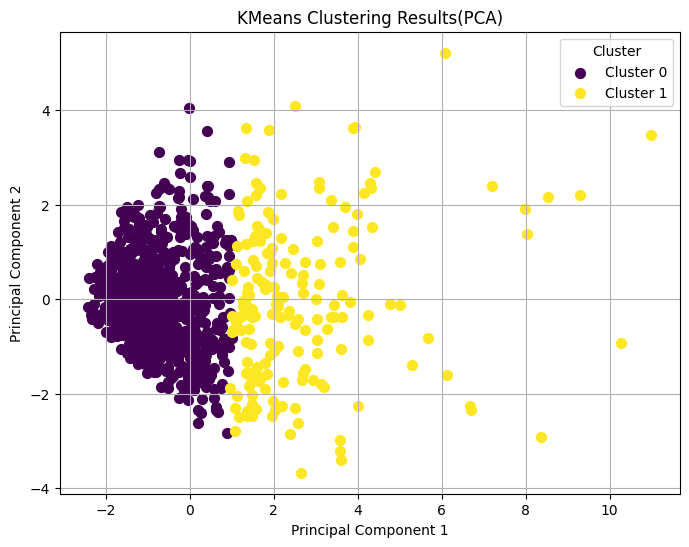

In [ ]:
unique_labels = np.unique(kmeans.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    cluster_data = pca_data[kmeans.labels_ == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {label}', marker='o', s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results(PCA)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('kmeans_clustering_with_legend.png')

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [ ]:
# Apply PCA to the scaled data to get 3 components for 3D plotting
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_df)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(x=pca_data_3d[:, 0], y=pca_data_3d[:, 1], z=pca_data_3d[:, 2],
                    color=kmeans.labels_.astype(str), # Convert labels to string for discrete colors
                    title='KMeans Clustering Results (3D PCA)')
fig.show()